In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [25]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [26]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [27]:
A = big5_sc.loc[:, "A1":"A10"]

In [28]:
A.loc[:,"score"] = big5_sc.loc[:,"A_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_16984\1542545691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A.loc[:,"score"] = big5_sc.loc[:,"A_SC"]


In [29]:
A

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,score
0,5,5,5,5,4,3,5,5,4,5,46
1,5,3,3,4,2,4,4,3,4,3,35
2,1,1,1,5,5,5,5,5,5,5,38
3,4,5,2,4,3,5,3,4,4,3,37
4,1,5,3,5,5,5,5,5,5,5,44
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,5,5,5,5,5,5,1,5,5,42
19715,4,3,4,4,4,4,4,3,3,3,36
19716,2,3,1,2,1,5,4,4,1,3,26
19717,3,3,4,4,4,4,4,5,4,3,38


In [30]:
categorys = []
for val in A['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
A['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_16984\910928946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['C'] = categorys


In [31]:
A

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,score,C
0,5,5,5,5,4,3,5,5,4,5,46,1
1,5,3,3,4,2,4,4,3,4,3,35,1
2,1,1,1,5,5,5,5,5,5,5,38,1
3,4,5,2,4,3,5,3,4,4,3,37,1
4,1,5,3,5,5,5,5,5,5,5,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,5,5,5,5,5,5,1,5,5,42,1
19715,4,3,4,4,4,4,4,3,3,3,36,1
19716,2,3,1,2,1,5,4,4,1,3,26,0
19717,3,3,4,4,4,4,4,5,4,3,38,1


In [32]:
A_train_X, A_train_y = A.iloc[:int(len(A.index)*0.8), :-2], A.iloc[:int(len(A.index)*0.8), -1]
A_test_X, A_test_y = A.iloc[int(len(A.index)*0.8):, :-2], A.iloc[int(len(A.index)*0.8):, -1]
A_test_X = A_test_X.reset_index(drop=True)

In [33]:
A_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
A_classifier.fit(A_train_X, A_train_y)

A_train_score = A_classifier.score(A_train_X, A_train_y)
print(A_train_score)

A_score = A_classifier.score(A_test_X, A_test_y)
print(A_score)

0.9995562599049128
0.9761663286004056


In [34]:
A_train_y_pred = A_classifier.predict(A_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(A_train_y), (A_train_y != A_train_y_pred).sum()))
print('정확도 : %.2f' %((len(A_train_y) - (A_train_y != A_train_y_pred).sum()) / len(A_train_y)))

총 학습 개수 : 15775, 오류개수 : 7
정확도 : 1.00


In [35]:
A_y_pred = A_classifier.predict(A_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(A_test_y), (A_test_y != A_y_pred).sum()))
print('정확도 : %.2f' %((len(A_test_y) - (A_test_y != A_y_pred).sum()) / len(A_test_y)))

총 테스트 개수 : 3944, 오류개수 : 94
정확도 : 0.98


feature ranking:
1. feature A7 (0.203)
2. feature A4 (0.169)
3. feature A9 (0.137)
4. feature A5 (0.102)
5. feature A6 (0.086)
6. feature A2 (0.069)
7. feature A8 (0.068)
8. feature A3 (0.065)
9. feature A1 (0.054)
10. feature A10 (0.047)


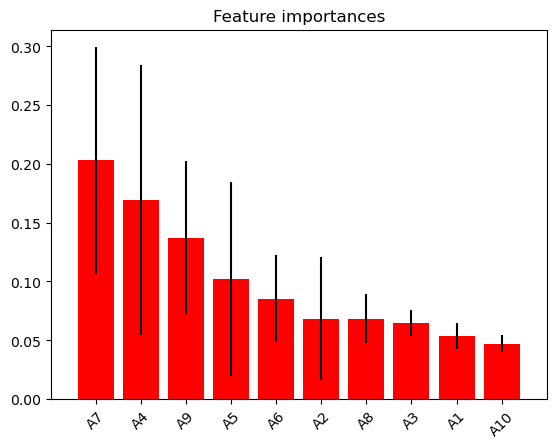

In [36]:
importances = A_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in A_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(A_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, A_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(A_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(A_train_X.columns)), A_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(A_train_X.columns)])
plt.show()

In [37]:
random.seed(0)
shuffled_scores = {}

for feature in A_train_X.columns:
    copy = A_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = A_classifier.score(copy, A_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'A1': 0.9840253565768621, 'A2': 0.9838351822503962, 'A3': 0.9793977812995246, 'A4': 0.977242472266244, 'A5': 0.981553090332805, 'A6': 0.9766085578446909, 'A7': 0.965324881141046, 'A8': 0.985229793977813, 'A9': 0.97229793977813, 'A10': 0.9890332805071316}


In [38]:
print("Original Classfication Accuracy : %.4f"%A_train_score)
for n in range(len(A_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[A_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9996
1 high importance shuffled Accuracy : 0.9653
2 high importance shuffled Accuracy : 0.9772
3 high importance shuffled Accuracy : 0.9723
4 high importance shuffled Accuracy : 0.9816
5 high importance shuffled Accuracy : 0.9766
6 high importance shuffled Accuracy : 0.9838
7 high importance shuffled Accuracy : 0.9852
8 high importance shuffled Accuracy : 0.9794
9 high importance shuffled Accuracy : 0.9840
10 high importance shuffled Accuracy : 0.9890


In [39]:
random.seed(0)
shuffled_scores = {}

for feature in A_test_X.columns:
    copy = A_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = A_classifier.score(copy, A_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'A1': 0.9642494929006086, 'A2': 0.9667849898580122, 'A3': 0.9639959432048681, 'A4': 0.9619675456389453, 'A5': 0.966024340770791, 'A6': 0.960446247464503, 'A7': 0.9589249492900609, 'A8': 0.9667849898580122, 'A9': 0.9614604462474645, 'A10': 0.973630831643002}


In [40]:
print("Original Classfication Accuracy : %.4f"%A_score)
for n in range(len(A_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[A_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9762
1 high importance shuffled Accuracy : 0.9589
2 high importance shuffled Accuracy : 0.9620
3 high importance shuffled Accuracy : 0.9615
4 high importance shuffled Accuracy : 0.9660
5 high importance shuffled Accuracy : 0.9604
6 high importance shuffled Accuracy : 0.9668
7 high importance shuffled Accuracy : 0.9668
8 high importance shuffled Accuracy : 0.9640
9 high importance shuffled Accuracy : 0.9642
10 high importance shuffled Accuracy : 0.9736


In [55]:
A2_se_train_X = A_train_X.copy()
A2_se_train_X = A2_se_train_X.loc[:, ["A7", "A4"]]

A2_se_test_X = A_test_X.copy()
A2_se_test_X = A2_se_test_X.loc[:, ["A7", "A4"]]
A2_se_test_X = A2_se_test_X.reset_index(drop=True)

rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

A2_se_classifier = RandomForestClassifier()

A2_rf_grid = GridSearchCV(A2_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
A2_rf_grid.fit(A2_se_train_X, A_train_y)

print("Best accuracy : {0:.4f}".format(A2_rf_grid.best_score_))
print("Best hyperparameter : ", A2_rf_grid.best_params_)

A2_test_score = A2_rf_grid.score(A2_se_test_X, A_test_y)
print("Tset accuracy : {0:.4f}".format(A2_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.9432
Best hyperparameter :  {'max_depth': 4, 'n_estimators': 50}
Tset accuracy : 0.9399


In [62]:
A2_se_train_X = A_train_X.copy()
A2_se_train_X = A2_se_train_X.loc[:, ["A7", "A4"]]

A2_se_test_X = A_test_X.copy()
A2_se_test_X = A2_se_test_X.loc[:, ["A7", "A4"]]
A2_se_test_X = A2_se_test_X.reset_index(drop=True)

rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [2, 4, 6, 8, 10],
    'min_samples_split' : [2, 4, 6, 8, 10]
}

A2_se_classifier = RandomForestClassifier()

A2_rf_grid = GridSearchCV(A2_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
A2_rf_grid.fit(A2_se_train_X, A_train_y)

print("Best accuracy : {0:.4f}".format(A2_rf_grid.best_score_))
print("Best hyperparameter : ", A2_rf_grid.best_params_)

A2_test_score = A2_rf_grid.score(A2_se_test_X, A_test_y)
print("Tset accuracy : {0:.4f}".format(A2_test_score))

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
Best accuracy : 0.9432
Best hyperparameter :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Tset accuracy : 0.9376


In [56]:
A3_se_train_X = A_train_X.copy()
A3_se_train_X = A3_se_train_X.loc[:, ["A7", "A4","A9"]]

A3_se_test_X = A_test_X.copy()
A3_se_test_X = A3_se_test_X.loc[:, ["A7", "A4","A9"]]
A3_se_test_X = A3_se_test_X.reset_index(drop=True)

rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

A3_se_classifier = RandomForestClassifier()

A3_rf_grid = GridSearchCV(A3_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
A3_rf_grid.fit(A3_se_train_X, A_train_y)

print("Best accuracy : {0:.4f}".format(A3_rf_grid.best_score_))
print("Best hyperparameter : ", A3_rf_grid.best_params_)

A3_test_score = A3_rf_grid.score(A3_se_test_X, A_test_y)
print("Tset accuracy : {0:.4f}".format(A3_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.9495
Best hyperparameter :  {'max_depth': 6, 'n_estimators': 50}
Tset accuracy : 0.9457


In [57]:
A4_se_train_X = A_train_X.copy()
A4_se_train_X = A4_se_train_X.loc[:, ["A7", "A4","A9","A5"]]

A4_se_test_X = A_test_X.copy()
A4_se_test_X = A4_se_test_X.loc[:, ["A7", "A4","A9","A5"]]
A4_se_test_X = A4_se_test_X.reset_index(drop=True)

rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

A4_se_classifier = RandomForestClassifier()

A4_rf_grid = GridSearchCV(A4_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
A4_rf_grid.fit(A4_se_train_X, A_train_y)

print("Best accuracy : {0:.4f}".format(A4_rf_grid.best_score_))
print("Best hyperparameter : ", A4_rf_grid.best_params_)

A4_test_score = A4_rf_grid.score(A4_se_test_X, A_test_y)
print("Tset accuracy : {0:.4f}".format(A4_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.9545
Best hyperparameter :  {'max_depth': 8, 'n_estimators': 50}
Tset accuracy : 0.9493


In [63]:
A5_se_train_X = A_train_X.copy()
A5_se_train_X = A5_se_train_X.loc[:, ["A7", "A4","A9","A5","A6"]]

A5_se_test_X = A_test_X.copy()
A5_se_test_X = A5_se_test_X.loc[:, ["A7", "A4","A9","A5","A6"]]
A5_se_test_X = A5_se_test_X.reset_index(drop=True)

rf_param_grid = {
    'n_estimators' : [10, 50, 100, 200, 500, 1000],
    'max_depth' : [2, 4, 6, 8, 10, 12, 14],
}

A5_se_classifier = RandomForestClassifier()

A5_rf_grid = GridSearchCV(A5_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
A5_rf_grid.fit(A5_se_train_X, A_train_y)

print("Best accuracy : {0:.4f}".format(A5_rf_grid.best_score_))
print("Best hyperparameter : ", A5_rf_grid.best_params_)

A5_test_score = A5_rf_grid.score(A5_se_test_X, A_test_y)
print("Tset accuracy : {0:.4f}".format(A5_test_score))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best accuracy : 0.9610
Best hyperparameter :  {'max_depth': 8, 'n_estimators': 50}
Tset accuracy : 0.9556


5